# TP 1 - Introduction au Machine Learning

## Exercice 5 - Clustering non-supervisé

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
# Charger le jeu de données
url = "https://raw.githubusercontent.com/alexissavva/cour_2600/main/unsupervised.csv"
data = pd.read_csv(url)

### Question 1

In [3]:
# Afficher les premières lignes du jeu de données
print(data.head())

          0         1
0  0.521115 -0.008186
1  0.985605 -0.141127
2 -0.982078  0.100228
3 -0.501722 -0.062242
4 -0.149753  0.481735


In [4]:
# Informations sur le jeu de données
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2500 non-null   float64
 1   1       2500 non-null   float64
dtypes: float64(2)
memory usage: 39.2 KB
None


In [5]:
# Statistiques descriptives
print(data.describe())

                 0            1
count  2500.000000  2500.000000
mean      0.000384     0.000393
std       0.560238     0.558851
min      -1.044519    -1.050217
25%      -0.446653    -0.445395
50%       0.001298     0.001081
75%       0.450135     0.445893
max       1.034578     1.035997


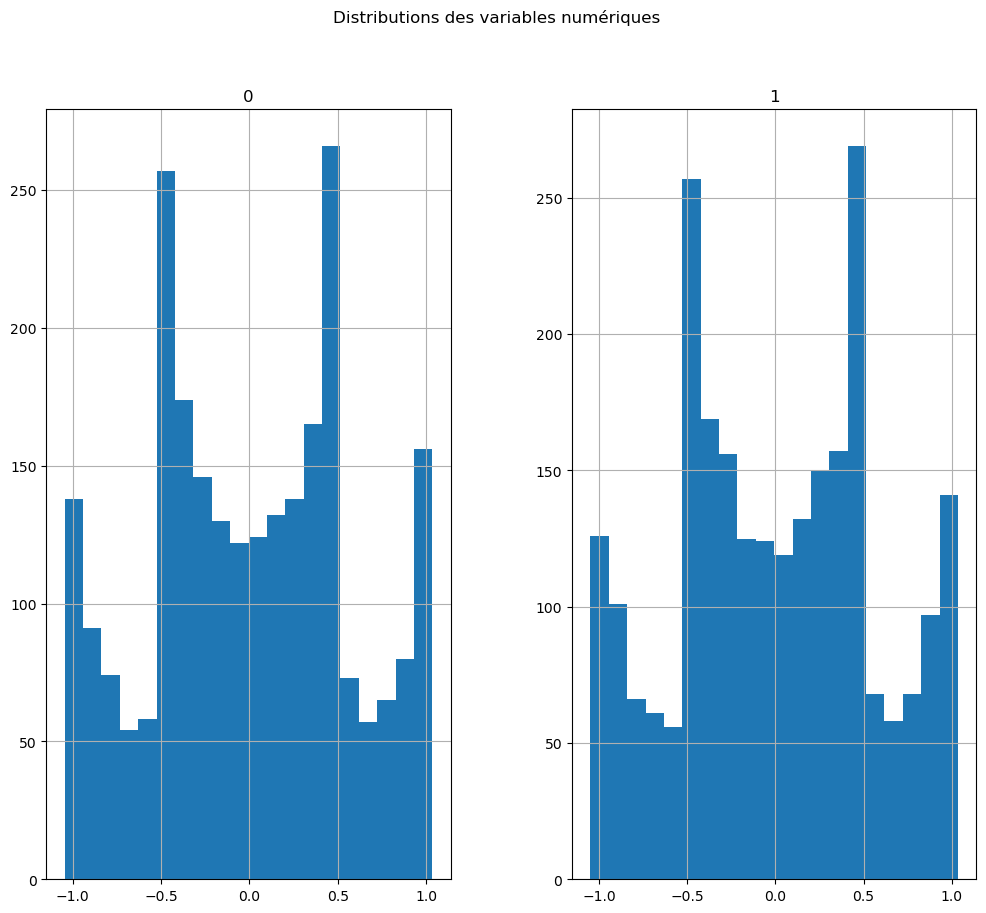

In [6]:
# Visualisation des distributions des variables numériques
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Distributions des variables numériques")
plt.show()

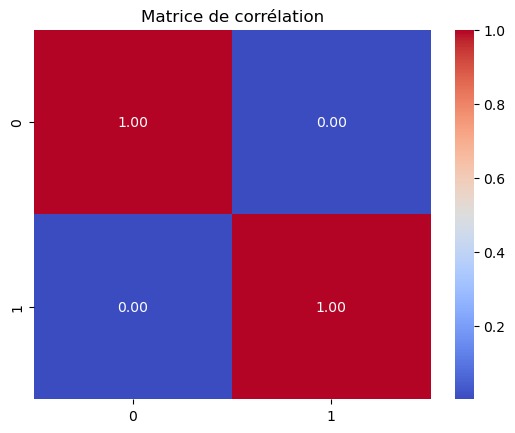

In [7]:
# Visualisation des corrélations entre les variables numériques
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

### Question 2

Pour estimer le nombre de classes dans un ensemble de données, plusieurs méthodes peuvent être utilisées. L'une des méthodes couramment utilisées est la "méthode du coude" (Elbow Method). Cette méthode consiste à exécuter l'algorithme de clustering (par exemple, K-Means) pour différents nombres de classes et à observer comment la variance intra-cluster change en fonction du nombre de classes. On recherche un point dans la courbe où l'ajout de plus de classes n'apporte plus une amélioration significative.

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_in

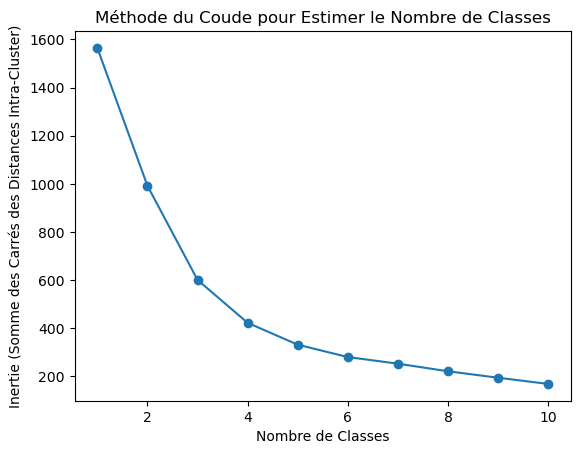

In [8]:
# Sélectionner les features (ignorer la colonne 'Label' si elle existe)
X = data.drop('Label', axis=1) if 'Label' in data.columns else data

# Appliquer la méthode du coude pour estimer le nombre de classes
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Visualiser la méthode du coude
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du Coude pour Estimer le Nombre de Classes')
plt.xlabel('Nombre de Classes')
plt.ylabel('Inertie (Somme des Carrés des Distances Intra-Cluster)')
plt.show()

### Question 3

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_in

Nombre optimal de classes estimé : 10


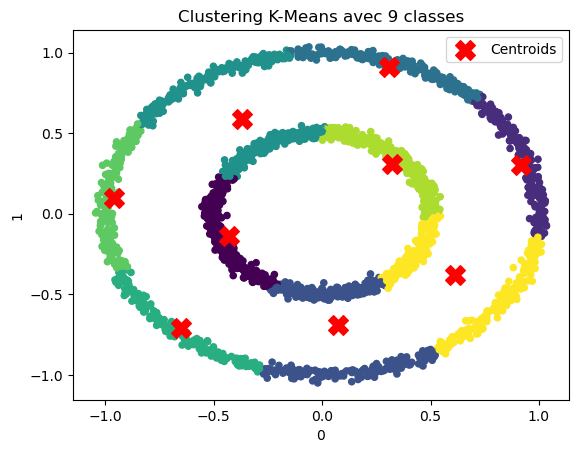

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


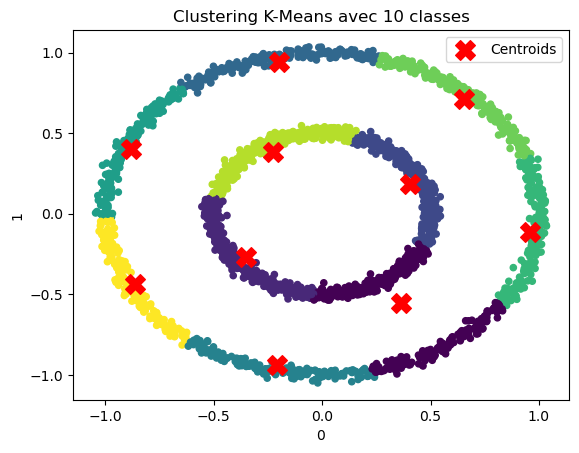

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


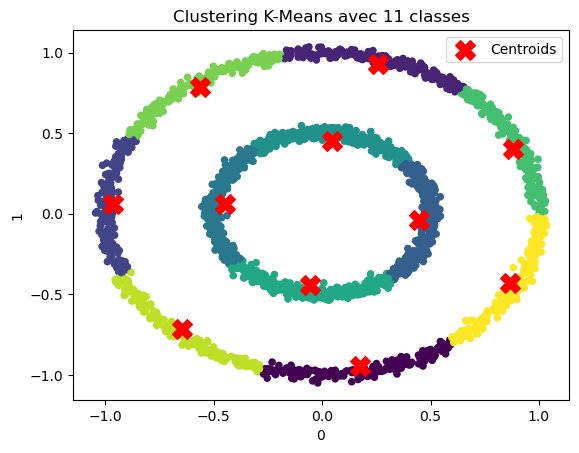

In [9]:
# Appliquer la méthode du coude pour estimer le nombre de classes
inertia = []
possible_k_values = range(1, 11)

for n_clusters in possible_k_values:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Trouver le nombre optimal de classes
optimal_k = np.argmin(inertia) + 1
print(f"Nombre optimal de classes estimé : {optimal_k}")

# Tester plusieurs valeurs de k
k_values_to_test = [optimal_k - 1, optimal_k, optimal_k + 1]
for n_clusters in k_values_to_test:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)

    # Visualiser les résultats du clustering (utiliser seulement pour des données bidimensionnelles)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', s=20)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, color='red', marker='X', label='Centroids')
    plt.title(f'Clustering K-Means avec {n_clusters} classes')
    plt.xlabel('0')
    plt.ylabel('1')
    plt.legend()
    plt.show()

### Question 4

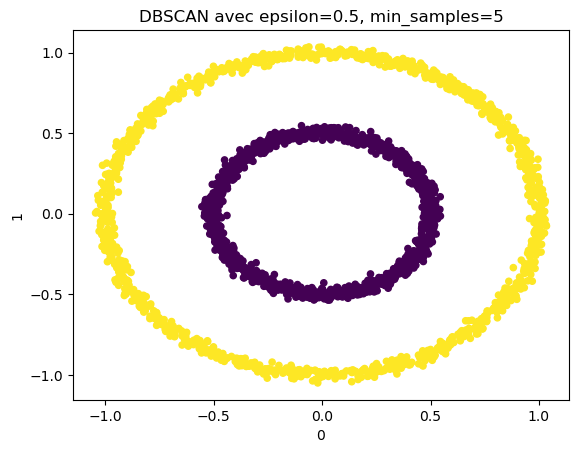

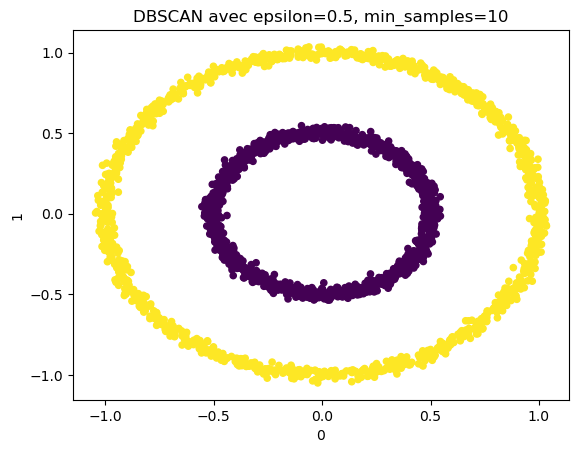

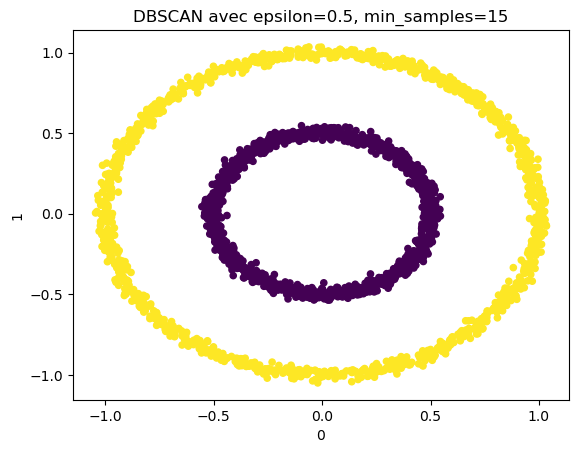

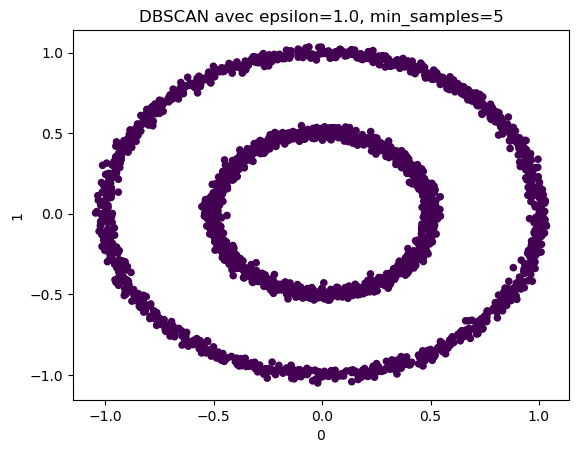

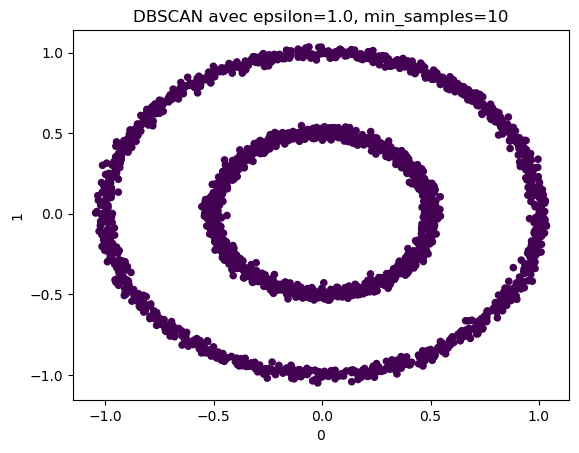

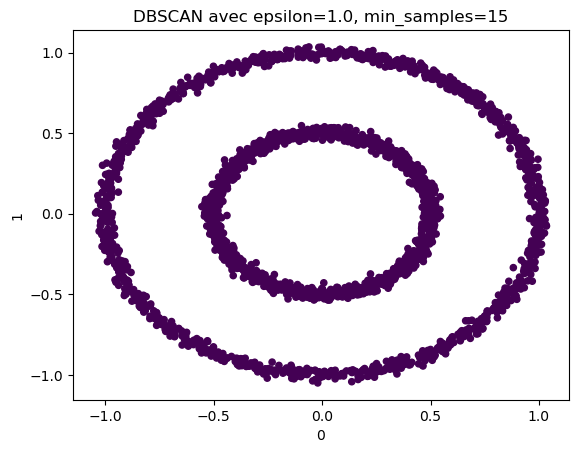

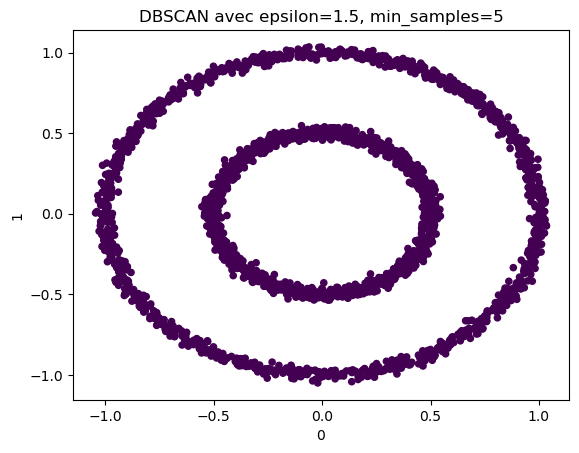

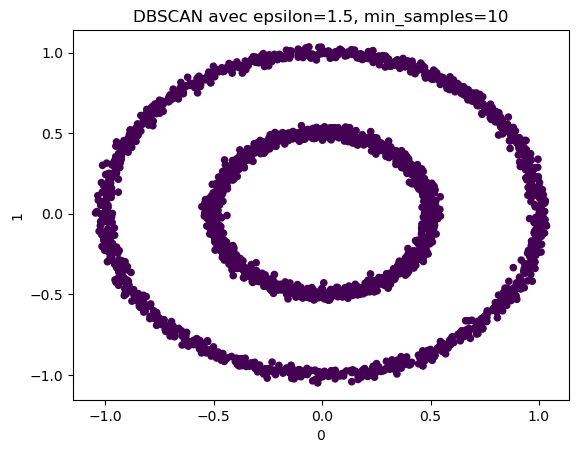

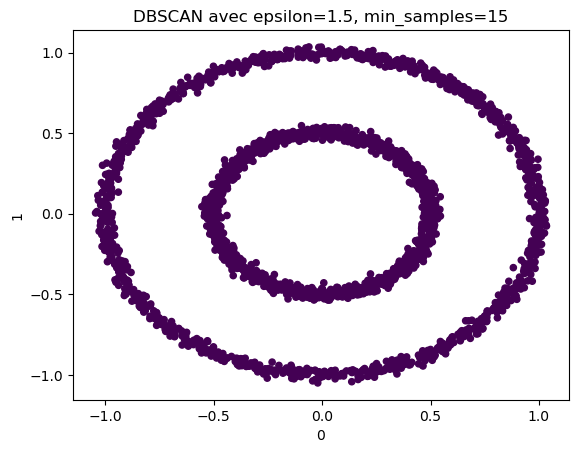

In [10]:
# Standardiser les données, car DBSCAN est sensible à l'échelle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer DBSCAN avec différents paramètres
epsilons = [0.5, 1.0, 1.5]  # Paramètre epsilon, la distance maximale entre deux échantillons pour être considérés dans le même cluster
min_samples_values = [5, 10, 15]  # Nombre minimal d'échantillons dans un cluster

for epsilon in epsilons:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)

        # Visualiser les résultats du clustering (utiliser seulement pour des données bidimensionnelles)
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', s=20)
        plt.title(f'DBSCAN avec epsilon={epsilon}, min_samples={min_samples}')
        plt.xlabel('0')
        plt.ylabel('1')
        plt.show()

DBSCAN est utile lorsque les clusters ont des formes complexes et des densités variables. Cependant, ajuster les paramètres de DBSCAN est crucial et nécessite pour une analyse approfondie des résultats pour comprendre les clusters et les points aberrants. DBSCAN se concentre principalement sur la détection de clusters denses. Si la visualisation est difficile en raison de la haute dimensionnalité, des techniques comme t-SNE peuvent aider à explorer la structure des clusters identifiés par DBSCAN.